# Chapter 1: Introduction to Clustering

### Implementing K-Means from Scratch

In [117]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [118]:
# Generate a random cluster dataset to experiment on. X = coordinate points, y = cluster labels
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, random_state=800)

#### What does the data look like?

In [119]:
X

array([[-3.83,  6.09],
       [-4.63,  5.54],
       [-2.88, -7.49],
       ...,
       [-3.71, -7.78],
       [-8.45, -1.84],
       [-4.68,  6.92]])

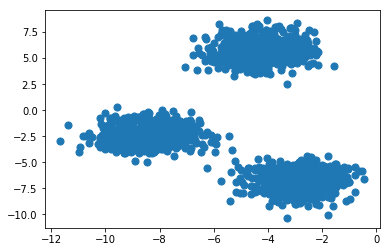

In [120]:
# Plotting just the coordinate points
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='tab20b')
plt.show()

In [121]:
# Labels come by default - since this is an unsupervised learning lesson disregard them
y

array([2, 2, 1, ..., 1, 0, 2])

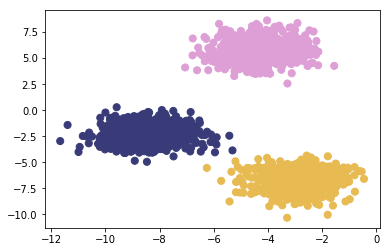

In [122]:
# For reference, plotting the coordinate points with the correct cluster labels
plt.scatter(X[:, 0], X[:, 1], c=y,s=50, cmap='tab20b')
plt.show()

#### Let's recreate the above results on our own! Below we go over an example of how you would implement this entirely from scratch, and then with some optimizations

#### Step 1

In [123]:
# Non-Vectorized Implementation of Euclidean distance

def dist(a, b):
    return math.sqrt(math.pow(a[0]-b[0],2) + math.pow(a[1]-b[1],2))

In [124]:
# Example Centroids
centroids = [[-6,2],[3,-4],[-5,10]]

In [125]:
# Example points in X
X[105:110]

array([[-3.1 ,  4.79],
       [-3.37, -7.37],
       [-3.37,  5.1 ],
       [-5.9 , -3.28],
       [-3.52,  7.78]])

In [126]:
# An example pass through calculating distances and choosing the index of the smallest distance as cluster
for x in X[105:110]:
    calcs = []
    for c in centroids:
        calcs.append(dist(x, c))
    print(calcs, "Cluster Membership: ", np.argmin(calcs, axis=0))

[4.027750355981394, 10.70202290628413, 5.542160268055164] Cluster Membership:  0
[9.73035280174993, 7.208665829113462, 17.44505393393603] Cluster Membership:  1
[4.066767506545852, 11.113179986633003, 5.1589701124301515] Cluster Membership:  0
[5.284418164665783, 8.931464028407861, 13.314157359115697] Cluster Membership:  0
[6.293105164930943, 13.467921029846712, 2.664298385076878] Cluster Membership:  2


#### Now that you've seen a barebones implementation, lets use optimized distance packages to speed up the process...

In [137]:
# Non-Vectorized Implementation of Euclidean distance (REFERENCE ONLY)

def dist(a, b):
    return math.sqrt(math.pow(a[0]-b[0],2) + math.pow(a[1]-b[1],2))

In [138]:
# Optimized Euclidean distance implementation
from scipy.spatial.distance import cdist

In [139]:
def k_means(X, K):
    # Keep track of history so you can see K-Means in action
    centroids_history = []
    labels_history = []
    
    # Randomly initialize Kcentroids
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    
    # While loop repeats process until difference between new/old centroids = 0 
    while True:
        # Euclidean distances are calculated for each point relative to centroids, and then np.argmin returns
        # the index location of the minimal distance - which cluster a point is assigned to
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
        
        # Take mean of points within clusters to find new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
        # If old centroids and new centroids no longer change, K-Means is complete and end. Otherwise continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

In [140]:
centers, labels, centers_hist, labels_hist = k_means(X, 3)

#### Visualize the steps of your K-Means implementation

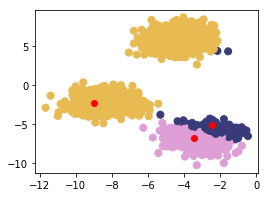

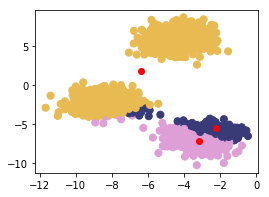

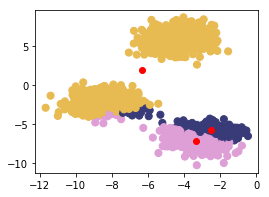

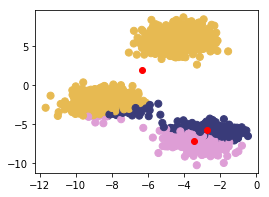

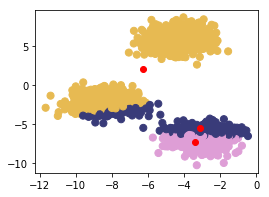

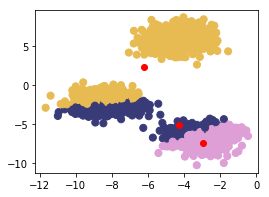

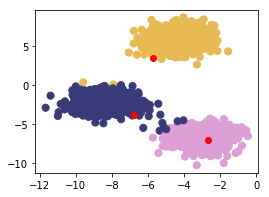

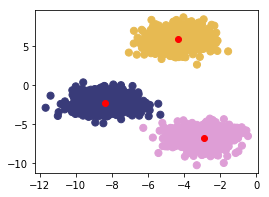

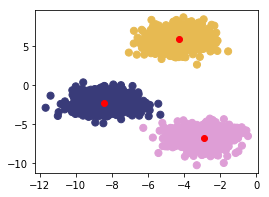

In [143]:
# Zip together the historical steps of centers and their labels
history = zip(centers_hist, labels_hist)

for x, y in history:
    plt.figure(figsize=(4,3))
    plt.scatter(X[:, 0], X[:, 1], c=y,
            s=50, cmap='tab20b');
    plt.scatter(x[:, 0], x[:, 1], c='red')
    plt.show()


### Classification Checking

Just for fun, since you created these blobs using a package you are given what the correct cluster membership labels are. You can compare these using standard classification metrics such as the built-in classification_report function. 

<b>Remember that this highlights it as a supervised learning problem and you will not be able to test this in reality as you won't know what the true class labels are. This is simply to illustrate the power of the K-Means implementation you created.</b>
    
Given the clearly defined nature of these 3 clusters you should get just about perfect accuracy. Once again, remember that this is not normal and only possible since you created this data on your own.

In [144]:
from sklearn.metrics import classification_report

# y = true cluster memberships, labels = your predicted cluster memberships
print(classification_report(y, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500

   micro avg       1.00      1.00      1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



## K-Means Using Sci-Kit Learn

Now that you know how K-Means works, rest assured that you don't have to recreate it every time you want to use it. The popular Sci-Kit Learn package has this unsupervised learning algorithm built in for easy deployment!

In [145]:
km = KMeans(3)

In [146]:
sci_kit_y = km.fit(X).predict(X)

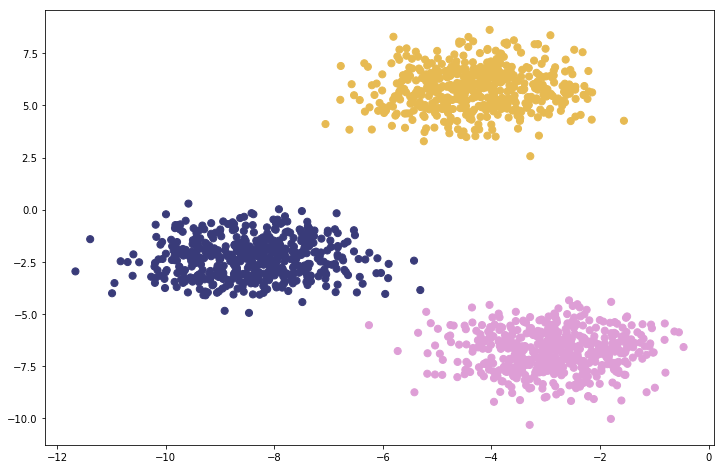

In [147]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c = sci_kit_y ,s=50, cmap='tab20b')
plt.show()

That's it! Just 3 lines of code and your K-Means clustering is good to go.